### 1

In [4]:
! pip install pyomo

In [5]:
from pyomo.environ import *

In [6]:
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

In [11]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

In [25]:
model = ConcreteModel()

model.x1 = Var(within=NonNegativeReals)
model.x2 = Var(within=NonNegativeReals)

model.obj = Objective(expr=model.x1 + 2 * model.x2, sense=minimize)

model.con1 = Constraint(expr=3 * model.x1 + 4 * model.x2 >= 1)
model.con2 = Constraint(expr=2 * model.x1 + 5 * model.x2 >= 2)

solver = SolverFactory('glpk',executable='/usr/bin/glpsol')
results = solver.solve(model)

print("Результаты:")
print("x1 =", model.x1())
print("x2 =", model.x2())
print("Значение целевой функции =", model.obj())

Результаты:
x1 = 0.0
x2 = 0.4
Значение целевой функции = 0.8


### 2


In [50]:
from random import uniform
from pyomo import environ as pyo

# Генерация случайных данных
m = 4
n = 5
a_data = {(i, j): uniform(1, 50) for i in range(1, n + 1) for j in range(1, m + 1)}
b_data = {i: uniform(1, 50) for i in range(1, n + 1)}
c_data = {j: uniform(1, 50) for j in range(1, m + 1)}

# Создание модели
model = pyo.ConcreteModel()

# Параметры модели
model.m = pyo.Param(initialize=m, within=pyo.NonNegativeIntegers)
model.n = pyo.Param(initialize=n, within=pyo.NonNegativeIntegers)
model.I = pyo.RangeSet(1, model.n)
model.J = pyo.RangeSet(1, model.m)
model.a = pyo.Param(model.I, model.J, initialize=a_data)
model.b = pyo.Param(model.I, initialize=b_data)
model.c = pyo.Param(model.J, initialize=c_data)
model.x = pyo.Var(model.J, domain=pyo.NonNegativeReals)

# Целевая функция
def obj_expression(model):
    return sum(model.c[j] * model.x[j] for j in model.J)
model.OBJ = pyo.Objective(rule=obj_expression)

# Ограничения
def ax_constraint_rule(model, i):
    return sum(model.a[i, j] * model.x[j] for j in model.J) >= model.b[i]
model.AxbConstraint = pyo.Constraint(model.I, rule=ax_constraint_rule)

In [52]:
# Решение модели
model.AxbConstraint = pyo.Constraint(model.I, rule=ax_constraint_rule)
solver = pyo.SolverFactory('clp')
solver.solve(model, tee=True)

# Вывод результатов
print("Решение:")
for j in model.J:
    print(f"x[{j}] = {pyo.value(model.x[j])}")
print("Значение целевой функции:", pyo.value(model.OBJ))

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


Coin LP version 1.17.8, build Jun  7 2023
command line - /content/bin/clp /tmp/tmpmwllny94.pyomo.nl -AMPL 
CLP 1.17.8: Решение:
x[1] = 0.0
x[2] = 0.5380473475089769
x[3] = 0.0
x[4] = 0.9850891207299259
Значение целевой функции: 40.19339267032015


In [51]:
# Решение модели
solver = SolverFactory('glpk',executable='/usr/bin/glpsol')
results = solver.solve(model)

# Вывод результатов
print("Решение:")
for j in model.J:
    print(f"x[{j}] = {pyo.value(model.x[j])}")
print("Значение целевой функции:", pyo.value(model.OBJ))

Решение:
x[1] = 0.0
x[2] = 0.538047347508976
x[3] = 0.0
x[4] = 0.985089120729926
Значение целевой функции: 40.19339267032014


###3


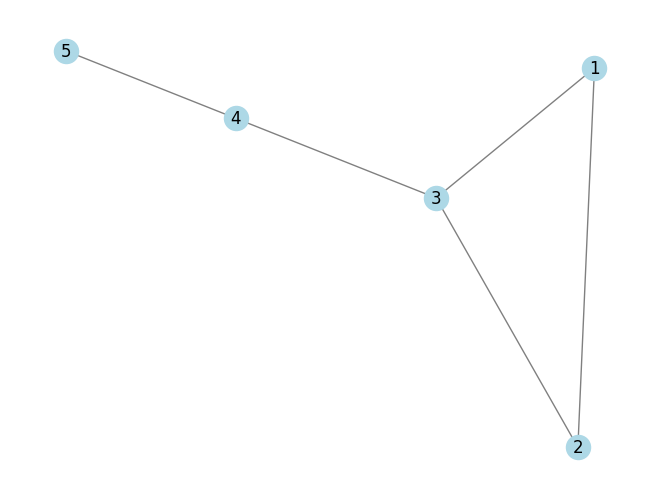

In [177]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем граф
G = nx.Graph()

# Добавляем вершины
G.add_nodes_from([1, 2, 3, 4, 5])

# Добавляем ребра
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])

# Строим граф
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')

# Отображаем граф
plt.show()


In [178]:
# Вызываем функцию для раскраски графа
colors = nx.greedy_color(G)

# Находим минимальное число цветов
min_colors = max(colors.values()) + 1

print("Минимальное число цветов:", min_colors)

Минимальное число цветов: 3


In [179]:
import numpy as np
adjacency_matrix = nx.adjacency_matrix(G)
E = adjacency_matrix.toarray()
print("Матрица смежности графа:")
print(E)

Матрица смежности графа:
[[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 0]
 [0 0 1 0 1]
 [0 0 0 1 0]]


In [138]:
!apt-get install -y -qq glpk-utils

In [180]:
# Создаем модель
model = ConcreteModel()

# Определяем параметры
V = [1, 2, 3, 4, 5]  # Вершины графа
C = [1, 2, 3]  # Цвета

# Определяем переменные
model.X = Var(V, C, within=Binary)

# Определяем целевую функцию
model.y = Var()

# Определяем ограничения
model.constraints = ConstraintList()
for v in V:
    model.constraints.add(sum(model.X[v, c] for c in C) == 1)  # Сумма X[v, c] = 1 для каждой вершины v

for v in V:
    for c in C:
        for u in V:
            if u != v:
                model.constraints.add(model.X[v, c] + model.X[u, c] <= 1)  # X[v, c] + X[u, c] <= 1 для всех v, u и c

for v in V:
    for c in C:
        model.constraints.add(model.y >= c * model.X[v, c])  # y >= c * X[v, c] для всех v и c

# Определяем целевую функцию
model.objective = Objective(expr=model.y, sense=minimize)

# Решаем задачу
solver = SolverFactory('glpk',executable='/usr/bin/glpsol')
results = solver.solve(model)

# Получаем минимальное количество цветов
min_colors = len(C)
for v in V:
    for c in C:
        if model.X[v, c].value == 1:
            min_colors = min(min_colors, c)

print("Минимальное количество цветов:", min_colors)

Минимальное количество цветов: 3
